In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib
import theano
import theano.tensor as T
import timeit

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
# Generate a dataset
np.random.seed(0)
train_X, train_y = sklearn.datasets.make_moons(1000, noise=0.20)
train_y_onehot = np.eye(2)[train_y]

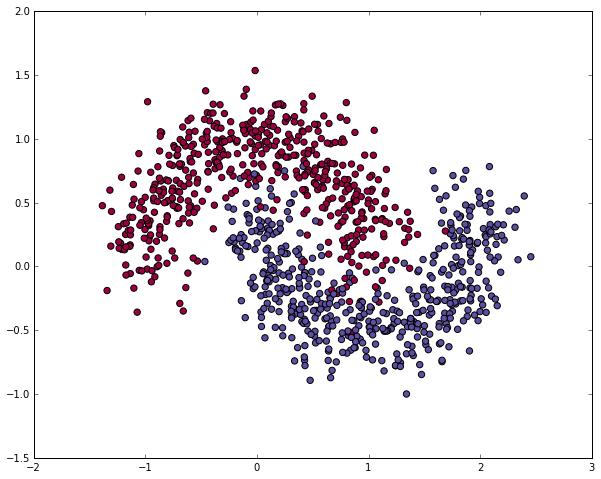

In [4]:
plt.scatter(train_X[:,0], train_X[:,1], s=40, c=train_y, cmap=plt.cm.Spectral);

In [5]:
class NeuralNetTheano(object):
    def __init__(self, input_dim, output_dim, nn_hdim, train_X, train_y, epsilon, reg_lambda):
        self.nn_input_dim = input_dim # input layer dimensionality
        self.nn_output_dim = output_dim # output layer dimensionality
        
        train_y_onehot = np.eye(2)[train_y]
        X = theano.shared(train_X.astype('float32')) # initialized on the GPU
        y = theano.shared(train_y_onehot.astype('float32'))

        # GPU NOTE: Conversion to float32 to store them on the GPU!
        W1 = theano.shared(np.random.randn(self.nn_input_dim, nn_hdim).astype('float32'), name='W1')
        b1 = theano.shared(np.zeros(nn_hdim).astype('float32'), name='b1')
        W2 = theano.shared(np.random.randn(nn_hdim, self.nn_output_dim).astype('float32'), name='W2')
        b2 = theano.shared(np.zeros(self.nn_output_dim).astype('float32'), name='b2')

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = T.tanh(z1)
        z2 = a1.dot(W2) + b2
        y_hat = T.nnet.softmax(z2)

        # The regularization term (optional)
        loss_reg = 1./len(train_X) * reg_lambda/2 * (T.sum(T.sqr(W1)) + T.sum(T.sqr(W2))) 
        # the loss function we want to optimize
        loss = T.nnet.categorical_crossentropy(y_hat, y).mean() + loss_reg
        # Returns a class prediction
        prediction = T.argmax(y_hat, axis=1)

        # Gradients
        dW2 = T.grad(loss, W2)
        db2 = T.grad(loss, b2)
        dW1 = T.grad(loss, W1)
        db1 = T.grad(loss, b1)

        # Note that we removed the input values because we will always use the same shared variable
        # GPU NOTE: Removed the input values to avoid copying data to the GPU.
        forward_prop = theano.function([], y_hat)
        calculate_loss = theano.function([], loss)
        predict = theano.function([], prediction)

        # GPU NOTE: Removed the input values to avoid copying data to the GPU.
        gradient_step = theano.function(
            [],
            # profile=True,
            updates=((W2, W2 - epsilon * dW2),
                     (W1, W1 - epsilon * dW1),
                     (b2, b2 - epsilon * db2),
                     (b1, b1 - epsilon * db1)))
        
    def build_model(num_passes=20000, print_loss=False):
        # Re-Initialize the parameters to random values. We need to learn these.
        np.random.seed(0)
        # GPU NOTE: Conversion to float32 to store them on the GPU!
        W1.set_value((np.random.randn(self.nn_input_dim, nn_hdim) / np.sqrt(self.nn_input_dim)).astype('float32'))
        b1.set_value(np.zeros(nn_hdim).astype('float32'))
        W2.set_value((np.random.randn(nn_hdim, self.nn_output_dim) / np.sqrt(nn_hdim)).astype('float32'))
        b2.set_value(np.zeros(self.nn_output_dim).astype('float32'))

        # Gradient descent. For each batch...
        for i in xrange(0, num_passes):
            # This will update our parameters W2, b2, W1 and b1!
            gradient_step()

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print "Loss after iteration %i: %f" %(i, calculate_loss())


In [6]:
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hdim = 1000 # hiden layer dimensionality

# Gradient descent parameters
epsilon = np.float32(0.01) # learning rate for gradient descent
reg_lambda = np.float32(0.01) # regularization strength 

In [7]:
NNT = NeuralNetTheano(nn_input_dim, nn_output_dim, nn_hdim, train_X, train_y, epsilon, reg_lambda)
NNT.build_model(print_loss=True)



Agreeing to the Xcode/iOS license requires admin privileges, please re-run as root via sudo.





00001	#include <Python.h>
00002	#include <iostream>
00003	#include <math.h>
00004	#include <numpy/arrayobject.h>
00005	#include <numpy/arrayscalars.h>
00006	//////////////////////
00007	////  Support Code
00008	//////////////////////
00009	
00010	
00011	    namespace {
00012	    struct __struct_compiled_op_834dc0c5ccb8a6d9b28af4b063131265 {
00013	        PyObject* __ERROR;
00014	
00015	        PyObject* storage_V3;
00016	PyObject* storage_V1;
00017	        
00018	
00019	        __struct_compiled_op_834dc0c5ccb8a6d9b28af4b063131265() {}
00020	        ~__struct_compiled_op_834dc0c5ccb8a6d9b28af4b063131265(void) {
00021	            cleanup();
00022	        }
00023	
00024	        int init(PyObject* __ERROR, PyObject* storage_V3, PyObject* storage_V1) {
00025	            Py_XINCREF(storage_V3);
00026	Py_XINCREF(storage_V1);
00027	            this->storage_V3 = storage_V3;
00028	this->storage_V1 = storage_V1;
00029	            
00030	
00031	
00032	
00033	            this->__ERROR = __ERROR;


Exception: ('The following error happened while compiling the node', InplaceDimShuffle{x,0}(b1), '\n', 'Compilation failed (return status=69): . . Agreeing to the Xcode/iOS license requires admin privileges, please re-run as root via sudo.. . . ', '[InplaceDimShuffle{x,0}(b1)]')

In [4]:
# Generate a dataset
np.random.seed(0)
train_X, train_y = sklearn.datasets.make_moons(1000, noise=0.20)
train_y_onehot = np.eye(2)[train_y]

# Size definitions
num_examples = len(train_X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hdim = 10 # hiden layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = np.float32(0.01) # learning rate for gradient descent
reg_lambda = np.float32(0.01) # regularization strength 

# GPU NOTE: Conversion to float32 to store them on the GPU!
X = theano.shared(train_X.astype('float32')) # initialized on the GPU
y = theano.shared(train_y_onehot.astype('float32'))

# GPU NOTE: Conversion to float32 to store them on the GPU!
W1 = theano.shared(np.random.randn(nn_input_dim, nn_hdim).astype('float32'), name='W1')
b1 = theano.shared(np.zeros(nn_hdim).astype('float32'), name='b1')
W2 = theano.shared(np.random.randn(nn_hdim, nn_output_dim).astype('float32'), name='W2')
b2 = theano.shared(np.zeros(nn_output_dim).astype('float32'), name='b2')

# Forward propagation
z1 = X.dot(W1) + b1
a1 = T.tanh(z1)
z2 = a1.dot(W2) + b2
y_hat = T.nnet.softmax(z2)

# The regularization term (optional)
loss_reg = 1./num_examples * reg_lambda/2 * (T.sum(T.sqr(W1)) + T.sum(T.sqr(W2))) 
# the loss function we want to optimize
loss = T.nnet.categorical_crossentropy(y_hat, y).mean() + loss_reg
# Returns a class prediction
prediction = T.argmax(y_hat, axis=1)

# Gradients
dW2 = T.grad(loss, W2)
db2 = T.grad(loss, b2)
dW1 = T.grad(loss, W1)
db1 = T.grad(loss, b1)

# Note that we removed the input values because we will always use the same shared variable
# GPU NOTE: Removed the input values to avoid copying data to the GPU.
forward_prop = theano.function([], y_hat)
calculate_loss = theano.function([], loss)
predict = theano.function([], prediction)

# GPU NOTE: Removed the input values to avoid copying data to the GPU.
gradient_step = theano.function(
    [],
    # profile=True,
    updates=((W2, W2 - epsilon * dW2),
             (W1, W1 - epsilon * dW1),
             (b2, b2 - epsilon * db2),
             (b1, b1 - epsilon * db1)))

def build_model(num_passes=20000, print_loss=False):
    # Re-Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    # GPU NOTE: Conversion to float32 to store them on the GPU!
    W1.set_value((np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)).astype('float32'))
    b1.set_value(np.zeros(nn_hdim).astype('float32'))
    W2.set_value((np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)).astype('float32'))
    b2.set_value(np.zeros(nn_output_dim).astype('float32'))
    
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
        # This will update our parameters W2, b2, W1 and b1!
        gradient_step()
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print "Loss after iteration %i: %f" %(i, calculate_loss())


# Profiling
# theano.config.profile = True
# theano.config.profile_memory = True
# gradient_step()
# theano.printing.debugprint(gradient_step) 
# print gradient_step.profile.summary()
            
%timeit gradient_step()

1000 loops, best of 3: 315 µs per loop


In [5]:
build_model(num_passes=2000, print_loss=True)

Loss after iteration 0: 0.607577
Loss after iteration 1000: 0.312489


In [ ]:
build_model(num_passes=1000, print_loss=True)